In [1]:
import rawpy
import numpy as np

In [2]:
file_path = './nikon_D850.nef'
file_path = './0.ARW'

# 不能关掉 
# 如果用 with rawpy.imread('your_file.arw') as H_raw: 的写法 出了with block 会报错
H_raw=rawpy.imread(file_path)

# 读取raw data
raw=H_raw.raw_image

print(f"RAW Shape:{raw.shape}")


RAW Shape:(5320, 8000)


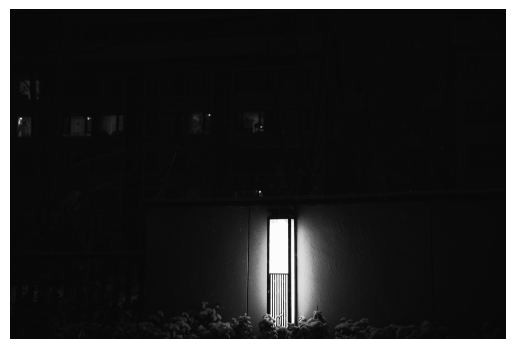

In [3]:
import matplotlib.pyplot as plt

# 假设 'raw' 是你从 RAW 文件中提取的原始数据
# 这里假设 'raw' 是一个二维数组，表示图像像素值
# 你可以根据实际情况调整绘制的方式

plt.imshow(raw, cmap='gray')  # 使用灰度色彩映射绘制原始 RAW 数据
plt.axis('off')  # 关闭坐标轴
plt.show()



In [4]:
# Meta datas

H_raw.camera_whitebalance,\
    H_raw.black_level_per_channel,\
    H_raw.camera_white_level_per_channel,\
    H_raw.color_matrix,\
    H_raw.color_desc

([1876.0, 1024.0, 3228.0, 1024.0],
 [512, 512, 512, 512],
 [15360, 15360, 15360, 15360],
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 b'RGBG')

## Debayer

In [ ]:
OB=H_raw.black_level_per_channel[0]
white_level=H_raw.camera_white_level_per_channel[0]
print(f"OB {OB} \n white_level {white_level} \n MAX{raw.max()}")

In [ ]:
def bayer_demosaic(raw,bayer='RG'): #朴素的bayer插值算法
    if bayer=='RG':
        img_r=raw[0::2,0::2]
        img_gr=raw[0::2,1::2]
        img_gb=raw[1::2,0::2]
        img_b=raw[1::2,1::2]
    img=np.dstack((img_r,(img_gr+img_gb)/2,img_b))
    return img   

img=bayer_demosaic(raw,bayer='RG')
img[img<OB]=OB
img=(img-OB).astype('float32')/(white_level-OB)

img_1=img #img_0:OB后的图像
img_1[img_1<0]=0 # Range [0,1.+] RGB [H/2,W/2,3]

plt.imshow(img_1)

### 可视化

In [ ]:
# Vis raw
vis_raw = raw
vis_raw[vis_raw<OB] = OB
vis_raw = (vis_raw-OB).astype(float)/(2**14)
# 2**14

# 将 vis_raw 数组保存为图片
# vis_raw = Image.fromarray(np.uint8(vis_raw * 255))  # 将像素值转换为 0-255 范围内的整数
# vis_raw.save('img_1_image.png')  # 保存图片

# 染色可视化



In [ ]:
zeros = np.zeros_like(vis_raw)
rgb_raw = np.dstack([zeros,zeros,zeros])
# rgb_raw.shape

# 0,1,2 R G B
# R channel 
rgb_raw[0::2,0::2,0] = vis_raw[0::2,0::2]
# G1 G2 channal
rgb_raw[0::2,1::2,1] = vis_raw[0::2,1::2]
rgb_raw[1::2,0::2,1] = vis_raw[1::2,0::2]

# B channal
rgb_raw[1::2,1::2,2] = vis_raw[1::2,1::2]

In [ ]:
# plt.imshow(rgb_raw)

rgb_raw_img = Image.fromarray(np.uint8(rgb_raw * 255))  # 将像素值转换为 0-255 范围内的整数
rgb_raw_img.save('RGB_RAW.png')  # 保存图片 
#需要用PNG格式 jpeg格式压缩后每个像素颜色就变了....


## 获取颜色

In [144]:
img_1.shape

(2660, 4000, 3)

## rawpy demosaicing 

In [ ]:
# To achieve only demosaicing without additional processing in rawpy, you can specify the no_auto_bright parameter as True and set other processing parameters to their default values. Here's an example code snippet:
rgb = H_raw.postprocess(demosaic_algorithm=rawpy.DemosaicAlgorithm.LINEAR, no_auto_bright=True,output_color=rawpy.ColorSpace.raw)

In [ ]:
plt.imshow(rgb)  # 使用灰度色彩映射绘制原始 RAW 数据
plt.axis('off')  # 关闭坐标轴
plt.show()